In [1]:
import pandas as pd

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext

import missingno as msno

In [2]:
# create a SparkSession instance with the name moviedb with Hive support enabled
# https://spark.apache.org/docs/latest/sql-data-sources-hive-tables.html
spark = SparkSession.builder.appName("moviedb").enableHiveSupport().getOrCreate()

# create a SparkContext instance which allows the Spark Application to access 
# Spark Cluster with the help of a resource manager which is usually YARN or Mesos
sc = SparkSession.builder.getOrCreate()

# create a SQLContext instance to access the SQL query engine built on top of Spark
sqlContext = SQLContext(spark)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/05/23 10:15:29 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
/Users/james.poulten/Documents/Development/MadeTech/Data Practice/learntech-exploratory-data-analysis/.venv/lib/python3.9/site-packages/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


## Read in data

In [41]:
file_path = "data/titanic/titanic_data.csv"

pdf = pd.read_csv(file_path)
sdf = spark.read.csv(file_path, header=True)

In [42]:
pdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
sdf.show(5, truncate=False)

+-----------+--------+------+---------------------------------------------------+------+---+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|Name                                               |Sex   |Age|SibSp|Parch|Ticket          |Fare   |Cabin|Embarked|
+-----------+--------+------+---------------------------------------------------+------+---+-----+-----+----------------+-------+-----+--------+
|1          |0       |3     |Braund, Mr. Owen Harris                            |male  |22 |1    |0    |A/5 21171       |7.25   |null |S       |
|2          |1       |1     |Cumings, Mrs. John Bradley (Florence Briggs Thayer)|female|38 |1    |0    |PC 17599        |71.2833|C85  |C       |
|3          |1       |3     |Heikkinen, Miss. Laina                             |female|26 |0    |0    |STON/O2. 3101282|7.925  |null |S       |
|4          |1       |1     |Futrelle, Mrs. Jacques Heath (Lily May Peel)       |female|35 |1    |0    |113803          |53.1   |C

In [44]:
pdf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1314.000000,1314.000000,1314.000000,1050.000000,1314.000000,1314.000000,1313.000000
mean,653.958904,0.378234,2.296804,29.860638,0.499239,0.384323,33.223181
std,378.271519,0.485131,0.837182,14.391962,1.040131,0.864338,51.674830
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,327.250000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,653.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,981.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [45]:
sdf.describe().show(truncate=False)

+-------+-----------------+------------------+------------------+------------------------------------------------+------+------------------+------------------+------------------+------------------+-----------------+-----+--------+
|summary|PassengerId      |Survived          |Pclass            |Name                                            |Sex   |Age               |SibSp             |Parch             |Ticket            |Fare             |Cabin|Embarked|
+-------+-----------------+------------------+------------------+------------------------------------------------+------+------------------+------------------+------------------+------------------+-----------------+-----+--------+
|count  |1314             |1314              |1314              |1314                                            |1314  |1050              |1314              |1314              |1314              |1313             |295  |1312    |
|mean   |653.9589041095891|0.378234398782344 |2.2968036529680367|null       

In [46]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1314 non-null   int64  
 1   Survived     1314 non-null   int64  
 2   Pclass       1314 non-null   int64  
 3   Name         1314 non-null   object 
 4   Sex          1314 non-null   object 
 5   Age          1050 non-null   float64
 6   SibSp        1314 non-null   int64  
 7   Parch        1314 non-null   int64  
 8   Ticket       1314 non-null   object 
 9   Fare         1313 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1312 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 123.3+ KB


In [47]:
sdf.printSchema()

root
 |-- PassengerId: string (nullable = true)
 |-- Survived: string (nullable = true)
 |-- Pclass: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- SibSp: string (nullable = true)
 |-- Parch: string (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: string (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



<Axes: >

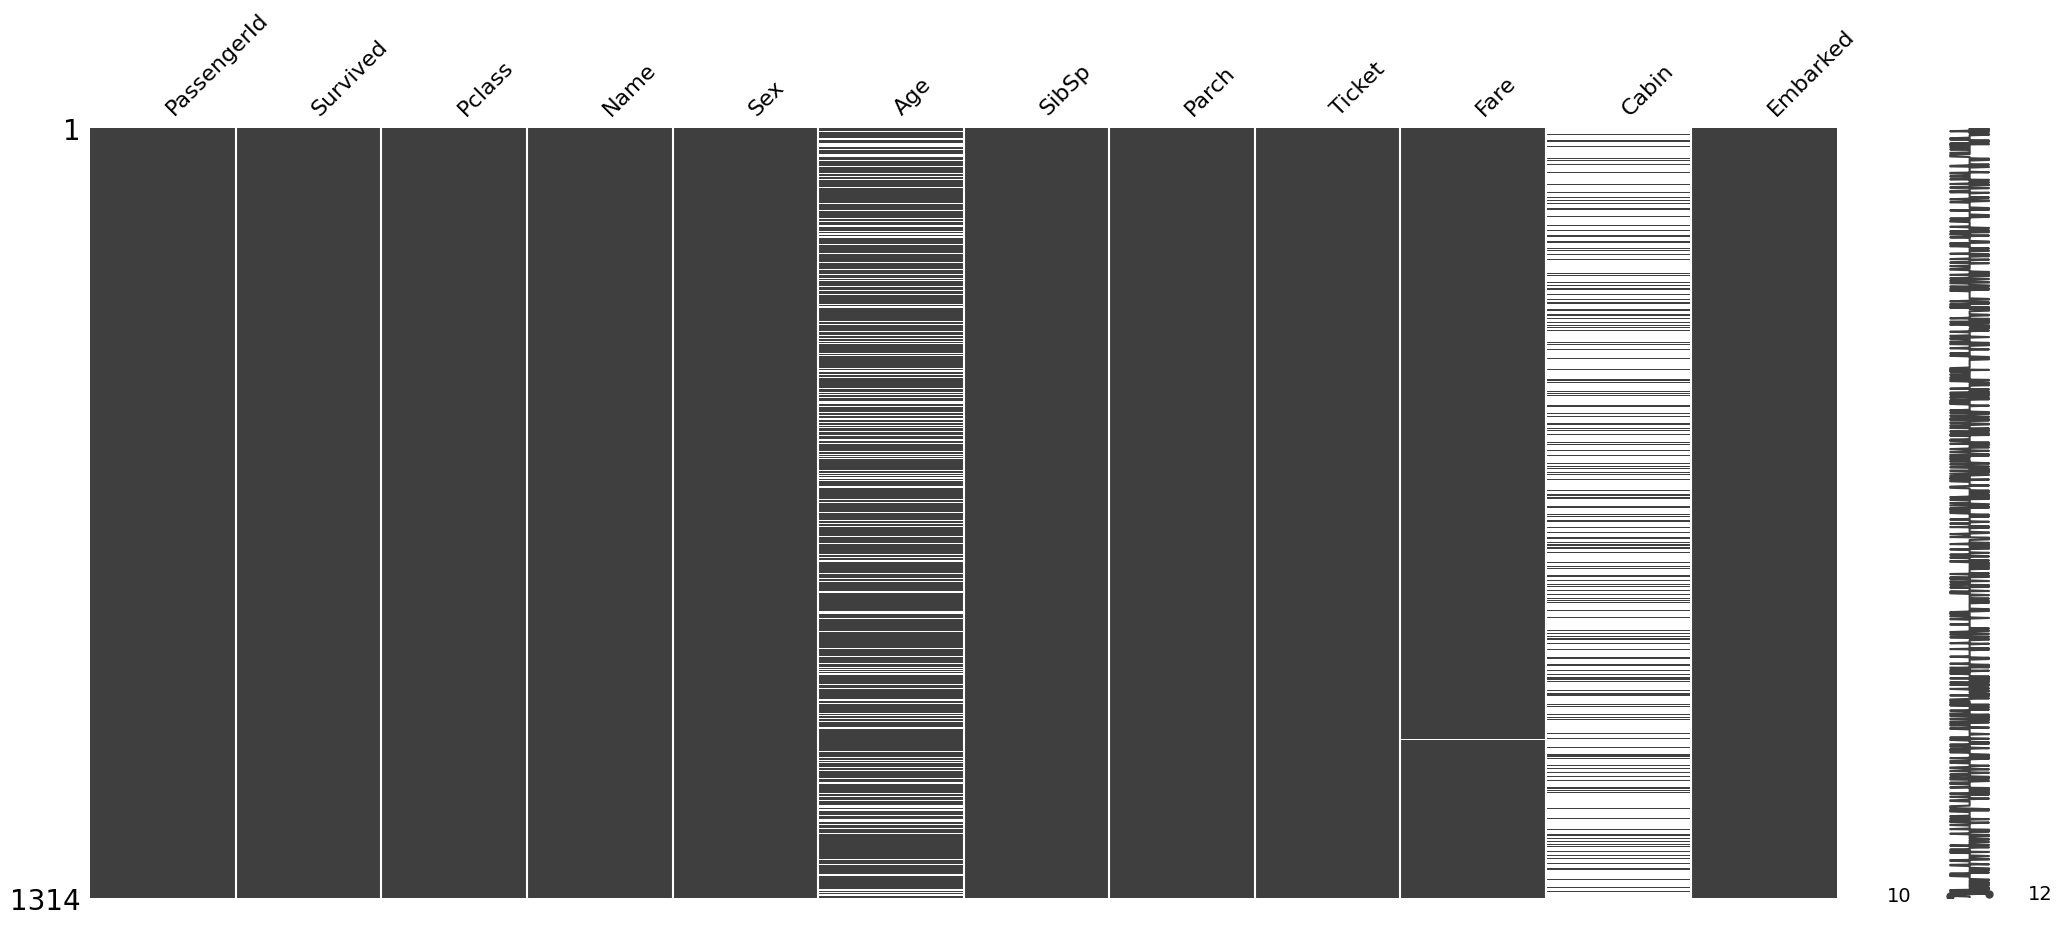

In [48]:
msno.matrix(pdf)

In [49]:
pdf.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             264
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1019
Embarked          2
dtype: int64

In [50]:
for c in pdf.columns:
    print(f"{c}: {len(pdf[c].unique())}")

PassengerId: 1309
Survived: 2
Pclass: 3
Name: 1307
Sex: 2
Age: 99
SibSp: 7
Parch: 8
Ticket: 929
Fare: 282
Cabin: 187
Embarked: 4


In [58]:
pdf["Pclass"].unique()

array([3, 1, 2])

In [56]:
pdf.loc[pdf.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1309,47,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,NaN,Q
1310,424,0,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,NaN,S
1311,392,1,3,"Jansson, Mr. Carl Olof",male,21.0,0,0,350034,7.7958,NaN,S
1312,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S
1313,990,1,3,"Braf, Miss. Elin Ester Maria",female,20.0,0,0,347471,7.8542,NaN,S


In [60]:
pdf = pdf.drop_duplicates().reset_index(drop=True)

<Axes: >

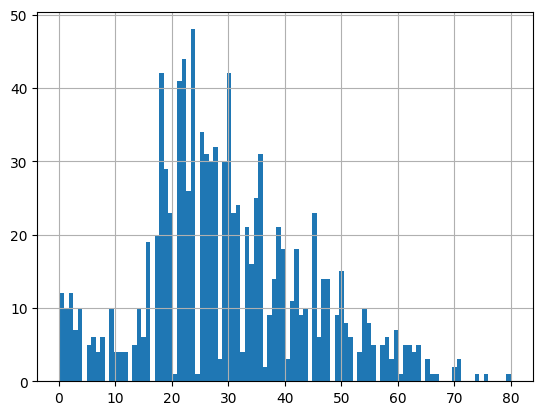

In [69]:
pdf["Age"].hist(bins=100)

<Axes: >

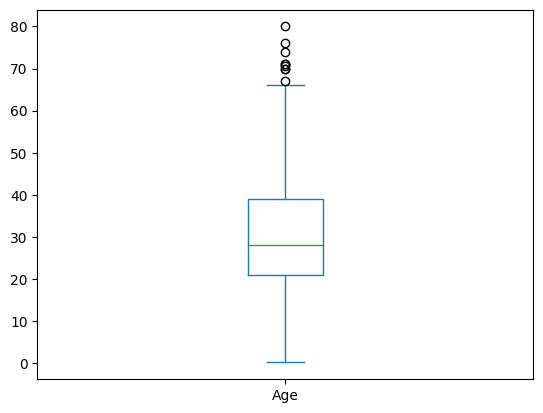

In [74]:
pdf["Age"].plot(kind="box")

In [75]:
pdf["Age"].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

<Axes: xlabel='Embarked'>

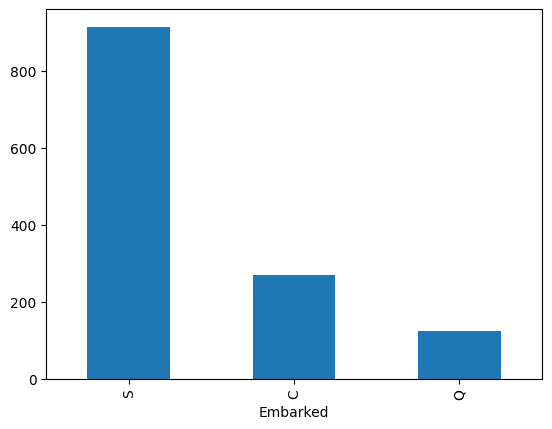

In [78]:
pdf["Embarked"].value_counts().plot(kind="bar")

<Axes: xlabel='Pclass'>

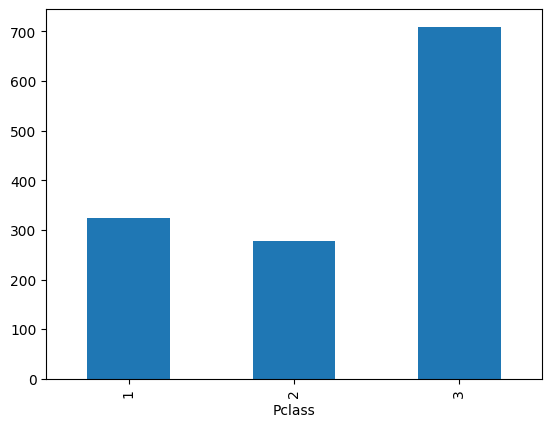

In [80]:
pdf["Pclass"].value_counts().sort_index().plot(kind="bar")

Sex
female    Axes(0.125,0.11;0.775x0.77)
male      Axes(0.125,0.11;0.775x0.77)
Name: Age, dtype: object

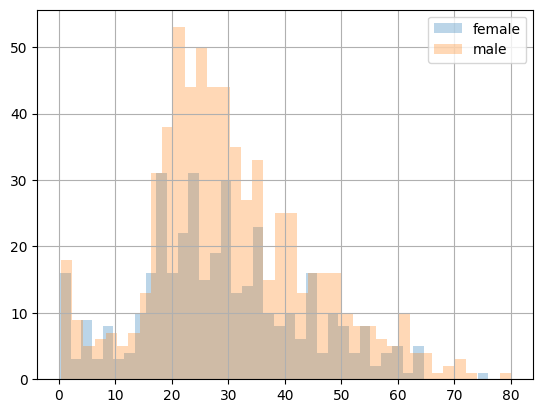

In [96]:
pdf.groupby("Sex")["Age"].hist(bins=40, alpha=0.3, legend=True)

In [97]:
pdf.groupby("Sex")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,388.0,28.687088,14.576962,0.17,19.0,27.0,38.0,76.0
male,658.0,30.585228,14.280581,0.33,21.0,28.0,39.0,80.0
